In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mne.externals.pymatreader import read_mat
from statistics import mean
sns.set_theme(style="darkgrid")

In [2]:
eeg = read_mat(r"C:\Users\willy\Documents\GitHub\2021-fastReach\data\willy_test\eeg.mat")
emg = read_mat(r"C:\Users\willy\Documents\GitHub\2021-fastReach\data\willy_test\emg.mat")
motion = read_mat(r"C:\Users\willy\Documents\GitHub\2021-fastReach\data\willy_test\motion.mat")

In [3]:
eeg = eeg['eeg']
emg = emg['emg']
motion = motion['motion']

From here we got: eeg (64, 250, 99), emg (1000, 99) and motion (250, 99)

<font size="5">     <b>I. Epochs and Evoked arrays</b>
    
    This first exploration will follow the pipeline "Raw data" + "info" --> "EpochsArray" or "EvokedArray"
    This would enable us to have a first data representation, as well as we can use the arrays for feature extraction.
    
<u/>1) Creation of the info<u/>

In [4]:
ch_eeg = [str(1+i) for i in range(0,64)]           #Could put the real channels' name for a better representation
ch_emg = 1
ch_motion = 1
sfreq = 250
sfreqm = 1000

infoeeg = mne.create_info(ch_eeg, sfreq, ch_types='misc')
infoemg = mne.create_info(ch_emg, sfreq, ch_types='misc')
infomotion = mne.create_info(ch_motion, sfreqm, ch_types='misc')

<u/> 2) Creation of the Epochs array <u/>

To do so, we need to reshape the data (n_epochs, n_channels, n_times), thus we use the info and the reshaped data to create the object.

In [5]:
#Creating empty matrices with the dimensions (n_epochs, n_channels, n_times)
a = np.zeros((99, 64, 250))
b = np.zeros((99, 1, 1000))
c = np.zeros((99, 1, 250))

for j in range(64):                  #Learn how to use reshape
     for i in range(99):
        a[i,j,:] = eeg[j,:,i]
        b[i,:,:] = emg[:,i]
        c[i,:,:] = motion[:,i]

In [6]:
epochs_eeg = mne.EpochsArray(a, infoeeg)
epochs_emg = mne.EpochsArray(b, infoemg)
epochs_motion = mne.EpochsArray(c, infomotion)

Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<u>2)  Plots the epochs array for visualization and check of the previous steps<u>

Using matplotlib as 2D backend.


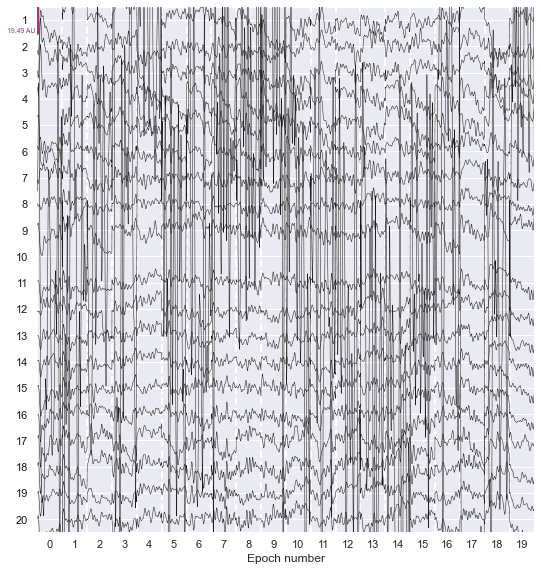

In [7]:
epochs_eeg.plot(picks='all', show_scrollbars=False)
plt.show()

<b/> -Specifying eeg data leads to a wrong plot, i don't know why, but it is ok if we don't specify the channel type.<b/>
     
   <b/>  -It seems to be way more artefacs that with the previous data set<b/>